## Customer segmentation

You are the owner of a shop. It doesn't matter if you own an e-commerce or a  supermarket. It doesn't matter if it is a small shop or a huge company such as Amazon or Netflix, it's better to know your customers.

You were able to collect basic data about your customers holding a membership card such as Customer ID, age, gender, annual income, and spending score. This last one is a score based on customer behavior and purchasing data.
There are some new products on the market that you are interested in selling. But you want to target a specific type of clients for each one of the products. Machine learning come in handy for this task. Clustering, a type of unsupervised algorithm, is able to create categories grouping similar individuals. So, you will find patterns among your customers. 

### Import modules requiered

First of all, we need to import the required module. 

In [1]:
import pandas as pd
import numpy as np
import sklearn

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

For this particular project, we'll work with two `scikit-learn` modules: `Kmeans` and `PCA`. They will allow us to perform a clustering algorithm and dimensionality reduction.

In [3]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [4]:
from sklearn.preprocessing import MinMaxScaler

In [5]:
import seaborn as sns
%matplotlib inline

In [6]:
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
import plotly.io as pio

### Read data into a DataFrame

We read the basic data stored in the `customers.csv` file into a `DataFrame` using pandas.

In [7]:
customers = pd.read_csv("customers.csv")

We check the first five rows of the DataFrame. We can see that we have: CustumerID, Gender, Age, Annual Income expressed as price x1000, and the spending score as we expected.

In [8]:
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Exploring the data

Now, it's time to explore the data to check the quality of the data and the distribution of the variables.

First, we check that if there is any missing value in the dataset.

In [9]:
print(f"Missing values in each variable: \n{customers.isnull().sum()}")

Missing values in each variable: 
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


We can also check if there are duplicated rows.

In [10]:
print(f"Duplicated rows: {customers.duplicated().sum()}")

Duplicated rows: 0


After that we can start observing the distribution of the variables.

In [13]:
def graph_histo(x, title):
    # Select size of bins by getting maximum and minimum and divide the substraction by 10
    size_bins = (max(x)-min(x))//(min(x)*10)
    
    # Initialize figure
    plt.figure(figsize=(6,5))
    # Plot the histogram
    sns.distplot(x, bins=size_bins, color="#55BD71", kde_kws={"lw": 1.5, "alpha":0.8},
                   hist_kws={"linewidth": 1.5, "edgecolor": "grey",
                            "alpha": 0.4, "color":"#85af91"})
    plt.xticks(size=14);
    plt.yticks(size=14);
    plt.ylabel("Frequency", size=16, labelpad=15);
    plt.title(title, size=18)
    plt.grid(False);
    plt.gca().spines["top"].set_visible(False);
    plt.gca().spines["right"].set_visible(False);
    plt.gca().spines["bottom"].set_visible(False);
    plt.gca().spines["left"].set_visible(False);
    plt.show()    

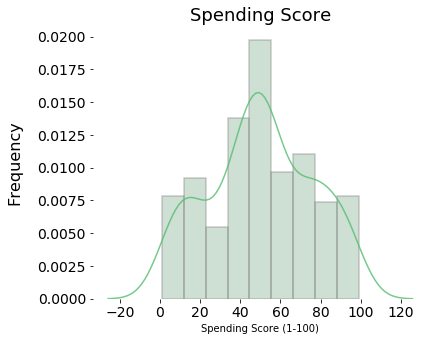

In [14]:
graph_histo(customers["Spending Score (1-100)"], "Spending Score")

(array([31., 19., 34., 29., 16., 26., 15., 10.,  6., 14.]),
 array([18. , 23.2, 28.4, 33.6, 38.8, 44. , 49.2, 54.4, 59.6, 64.8, 70. ]),
 <a list of 10 Patch objects>)

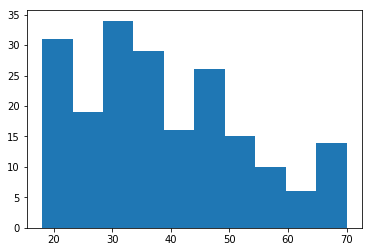

In [45]:
plt.hist(customers["Age"])

(array([24., 22., 28., 38., 30., 36.,  8.,  6.,  4.,  4.]),
 array([ 15. ,  27.2,  39.4,  51.6,  63.8,  76. ,  88.2, 100.4, 112.6,
        124.8, 137. ]),
 <a list of 10 Patch objects>)

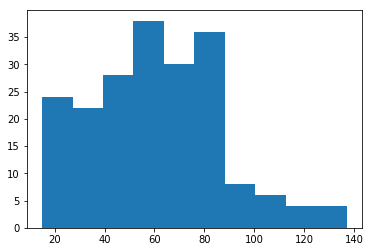

In [43]:
plt.hist(customers["Annual Income (k$)"])

In [9]:
X = customers.iloc[:, 1:]

In [15]:
X.Gender = X.Gender.apply(lambda x: 0 if x == "Male" else 1)

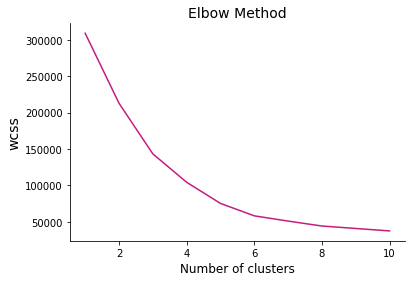

In [16]:
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss, c="#c51b7d")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.title('Elbow Method', size=14)
plt.xlabel('Number of clusters', size=12)
plt.ylabel('wcss', size=14)
plt.show() 

In [17]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=10, n_init=10, random_state=0)

y_means = kmeans.fit_predict(X)

In [18]:
pca = PCA(n_components=2).fit(X)

In [19]:
pca_2d = pca.transform(X)

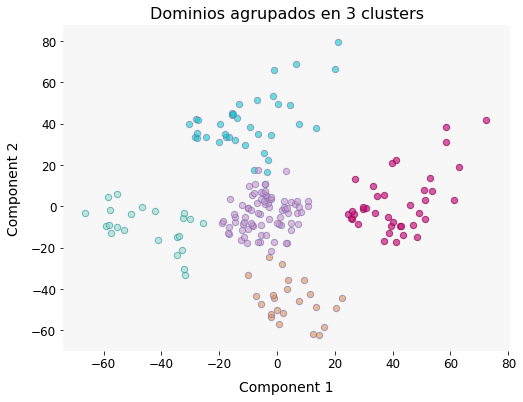

In [20]:
fig, ax = plt.subplots(figsize = (8, 6))

for i in range(0, pca_2d.shape[0]):
    if y_means[i] == 0:
        c1 = plt.scatter(pca_2d[i,0], pca_2d[i,1], c="#99d8c9", s=40, edgecolors="#1c9099", alpha=0.6)
    elif y_means[i] == 1:
        c2 = plt.scatter(pca_2d[i,0], pca_2d[i,1], c="#c51b8a", s=40, edgecolors="#980043", alpha=0.7)
    elif y_means[i] == 2:
        c3 = plt.scatter(pca_2d[i,0], pca_2d[i,1], c="#c994c7", s=40, edgecolors="#756bb1", alpha=0.6)
    elif y_means[i] == 3:    
        c4 = plt.scatter(pca_2d[i,0], pca_2d[i,1], c="#0bd0cb", s=40, edgecolors="#756bb1", alpha=0.6)
    elif y_means[i] == 4:
        c5 = plt.scatter(pca_2d[i,0], pca_2d[i,1], c="#e0904e", s=40, edgecolors="#756bb1", alpha=0.6)
        
        
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["left"].set_visible(False)

plt.xticks(size=12)
plt.yticks(size=12)

plt.xlabel("Component 1", size = 14, labelpad=10)
plt.ylabel("Component 2", size = 14, labelpad=10)

plt.title('Dominios agrupados en 3 clusters', size=16)

ax.set_facecolor("#f7f7f7")

plt.show()

In [23]:
X2 = customers.iloc[:, 2:]

In [24]:
x = []
y = []
z = []
for i in range(0, pca_2d.shape[0]):
    x.append(pca_2d[i,0])
    y.append(pca_2d[i,1])
    z.append(i)

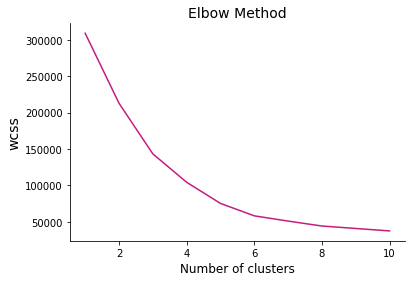

In [25]:
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss, c="#c51b7d")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.title('Elbow Method', size=14)
plt.xlabel('Number of clusters', size=12)
plt.ylabel('wcss', size=14)
plt.show() 

In [35]:
kmeans2 = KMeans(n_clusters=5, init='k-means++', max_iter=10, n_init=10, random_state=0)

y_means2 = kmeans2.fit_predict(X2)

In [36]:
pca2 = PCA(n_components=2).fit(X2)

In [37]:
pca_2d2 = pca2.transform(X)

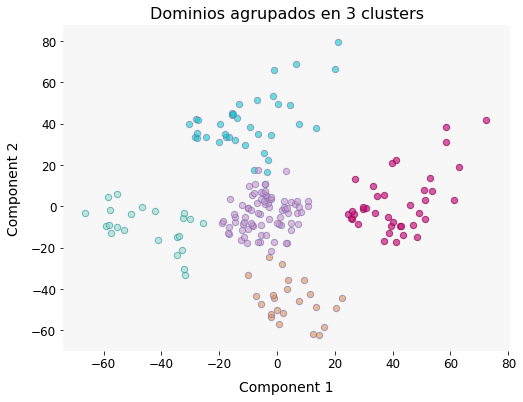

In [39]:
fig, ax = plt.subplots(figsize = (8, 6))

for i in range(0, pca_2d.shape[0]):
    if y_means2[i] == 0:
        c1 = plt.scatter(pca_2d2[i,0], pca_2d2[i,1], c="#99d8c9", s=40, edgecolors="#1c9099", alpha=0.6)
    elif y_means2[i] == 1:
        c2 = plt.scatter(pca_2d2[i,0], pca_2d2[i,1], c="#c51b8a", s=40, edgecolors="#980043", alpha=0.7)
    elif y_means2[i] == 2:
        c3 = plt.scatter(pca_2d2[i,0], pca_2d2[i,1], c="#c994c7", s=40, edgecolors="#756bb1", alpha=0.6)
    elif y_means2[i] == 3:    
        c4 = plt.scatter(pca_2d2[i,0], pca_2d2[i,1], c="#0bd0cb", s=40, edgecolors="#756bb1", alpha=0.6)
    elif y_means2[i] == 4:
        c5 = plt.scatter(pca_2d2[i,0], pca_2d2[i,1], c="#e0904e", s=40, edgecolors="#756bb1", alpha=0.6)
        
        
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["left"].set_visible(False)

plt.xticks(size=12)
plt.yticks(size=12)

plt.xlabel("Component 1", size = 14, labelpad=10)
plt.ylabel("Component 2", size = 14, labelpad=10)

plt.title('Dominios agrupados en 3 clusters', size=16)

ax.set_facecolor("#f7f7f7")

plt.show()

In [51]:
X4 = customers.iloc[:, 3:]

In [52]:
kmeans4 = KMeans(n_clusters=5, init='k-means++', max_iter=10, n_init=10, random_state=0)

y_means4 = kmeans2.fit_predict(X4)

In [55]:
sns.scatterplot()

TypeError: object of type 'NoneType' has no len()

In [76]:
labels = [customers["CustomerID"][i] for i in range(customers.shape[0])]

In [47]:
N = len(x)
colors = np.random.rand(N)*20
sz = np.random.rand(N)*30
#colors = [abs(j)*20 for j in x]
#sz = np.random.rand(N)*30


init_notebook_mode(connected=True)



data = [
    go.Scatter(
        x=x,
        y=y,
        mode='markers',
        text=labels,
        marker={'size': sz,
                'color': colors,
                'opacity': 0.6,
                'colorscale': 'Viridis'
                       })
        ]

layout = go.Layout(
    title='Desliza por encima de un punto para ver el dominio'
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='my_plot')

NameError: name 'labels' is not defined

In [ ]:
plotly.offline.plot(fig, filename='name.html') 